# Reconhecimento de Movimentos Utilizando uma Rede *Long Short-Term Memory* (LSTM)
## Aumento do número de camadas e neurónios

Variar learning rate e batch size

Pesquisar por fine-tuning de hiper parâmetros

Carregar no link da otimização Bayesiana

Colocar os valores da matriz de confusão (objeto `cm`)

Disponilibizar código no Github

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.utils import to_categorical, split_dataset
import pandas as pd

## Listagem das *features* a partir do ficheiro

In [2]:
labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None)

labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Carregamento e Tratamento dos *Datasets*

In [3]:
# Carregar os datasets
import numpy as np

X_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None)
y_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None)

X_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None)
y_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None)

X_teste = X_teste_val[0:round(0.9*X_teste_val.shape[0])]
X_val = X_teste_val[round(0.9*X_teste_val.shape[0]):]

y_teste = y_teste_val[0:round(0.9*y_teste_val.shape[0])]
y_val = y_teste_val[round(0.9*y_teste_val.shape[0]):]

# Preparar os dados para entrada na rede LSTM
X_treino = X_treino.values.reshape((X_treino.shape[0], 1, X_treino.shape[1]))
X_teste = X_teste.values.reshape((X_teste.shape[0], 1, X_teste.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)
y_val = to_categorical(y_val)

X_treino.shape[1], X_treino.shape[2]

(1, 561)

## Criação do Modelo da Rede Neuronal

In [4]:
import keras

# Definir a arquitetura da rede LSTM
modelo = Sequential()
modelo.add(LSTM(128, return_sequences=True, input_shape=(X_treino.shape[1], X_treino.shape[2])))
modelo.add(Dropout(0.5))
modelo.add(LSTM(128, return_sequences=True))
modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(64, activation="relu"))
modelo.add(Dense(7, activation="softmax"))

# Compilar o modelo
modelo.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "precision", "recall", "f1_score"])

C:\Users\daniel.a.goncalves\Documents\Faculdade\MEEC - Automação e Sistemas\2º Ano\2º Semestre\TEDI\Projeto\Criação Redes\tedi\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Treino da Rede Neuronal

In [5]:
# Treinar o modelo
historico = modelo.fit(X_treino, y_treino_cat, epochs=20, batch_size=10, validation_data=(X_val, y_val))
modelo.save("ModeloLSTM-Changed.keras")

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5065 - f1_score: 0.4165 - loss: 0.2875 - precision: 0.5948 - recall: 0.3192 - val_accuracy: 0.9492 - val_f1_score: 0.8065 - val_loss: 0.0632 - val_precision: 0.9490 - val_recall: 0.9458
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8395 - f1_score: 0.7216 - loss: 0.0982 - precision: 0.8413 - recall: 0.8367 - val_accuracy: 0.9085 - val_f1_score: 0.7411 - val_loss: 0.0475 - val_precision: 0.9116 - val_recall: 0.9085
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8798 - f1_score: 0.7577 - loss: 0.0792 - precision: 0.8819 - recall: 0.8782 - val_accuracy: 0.9763 - val_f1_score: 0.8367 - val_loss: 0.0229 - val_precision: 0.9762 - val_recall: 0.9729
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9188 - f1_score: 0.7881 - loss: 0.0591 - precision: 0.9191 - recall: 0.9184 - val_accuracy: 0.9966 - val_f1_score: 0.8531 - val_loss: 0.0115 - val_precision: 0.9966 - val_recall

## Avaliação da Precisão da Rede LSTM

In [6]:
# Avaliar a precisão do modelo
_, precisao, precision, recall, f1_score = modelo.evaluate(X_teste, y_teste_cat)
print(f"Precisão do Modelo: {precisao*100} %")
print(f"Precision do Modelo: {precision[-1]*100} %")
print(f"Recall do Modelo: {recall*100} %")
print(f"F1-Score do Modelo: {f1_score*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9343 - f1_score: 0.7837 - loss: 0.0510 - precision: 0.9343 - recall: 0.9343
Precisão do Modelo: 93.89140009880066 %
Precision do Modelo: 100.0 %
Recall do Modelo: 93.89140009880066 %
F1-Score do Modelo: 93.89140009880066 %


## Evolução da Precisão ao Longo do Treino

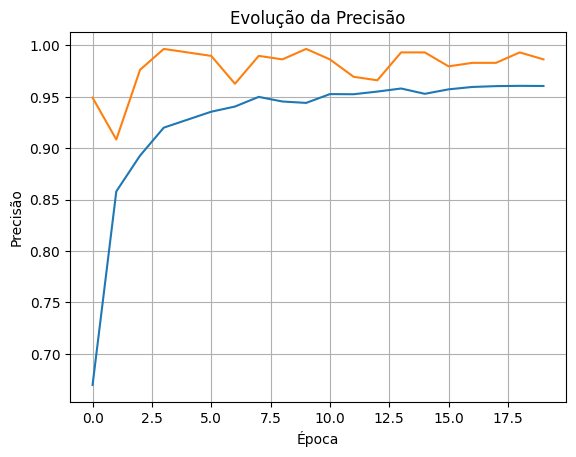

In [7]:
import matplotlib.pyplot as plt

precisao = historico.history['accuracy']
validacao = historico.history['val_accuracy']

plt.plot(precisao)
plt.plot(validacao)
plt.title('Evolução da Precisão')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.grid()
plt.savefig("Evolução Precisão Validação LSTM-Changed", bbox_inches="tight")
plt.show()

## Matriz de Confusão

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


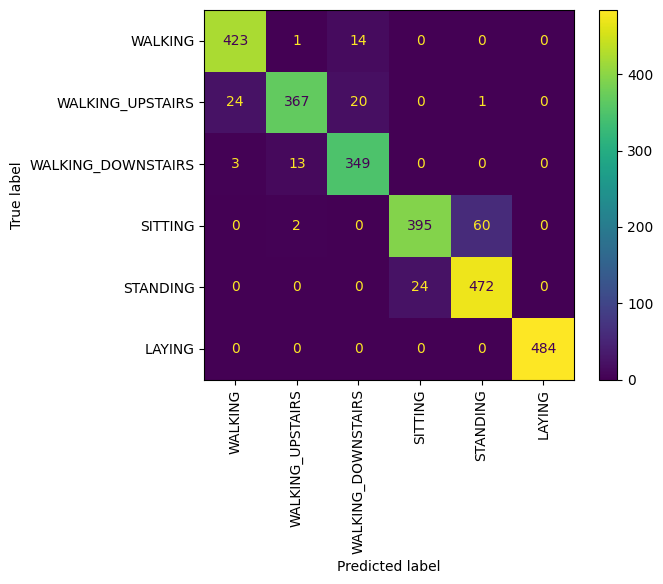

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Saídas previstas
y_previsto = modelo.predict(X_teste)
y_previsto = [np.argmax(y) for y in y_previsto]

# Saídas reais
y_real = [np.argmax(y) for y in y_teste_cat]

# Criação da matriz de confusão
cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation=90)
display.figure_.savefig("Matriz de Confusão LSTM-Changed", bbox_inches="tight")